In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [64]:
# Carregar os dados do arquivo
data = loadmat('trabalho4-2023-1.mat')
u = np.array(data['u'])
y = np.array(data['y'])
t = np.array(data['t'])

# Frequencia de amostragem (fs) e períido de amostragem (T)
fs = 2  # Hz
T = 1 / fs
print(t[0], t[-1])

[0.] [127.5]


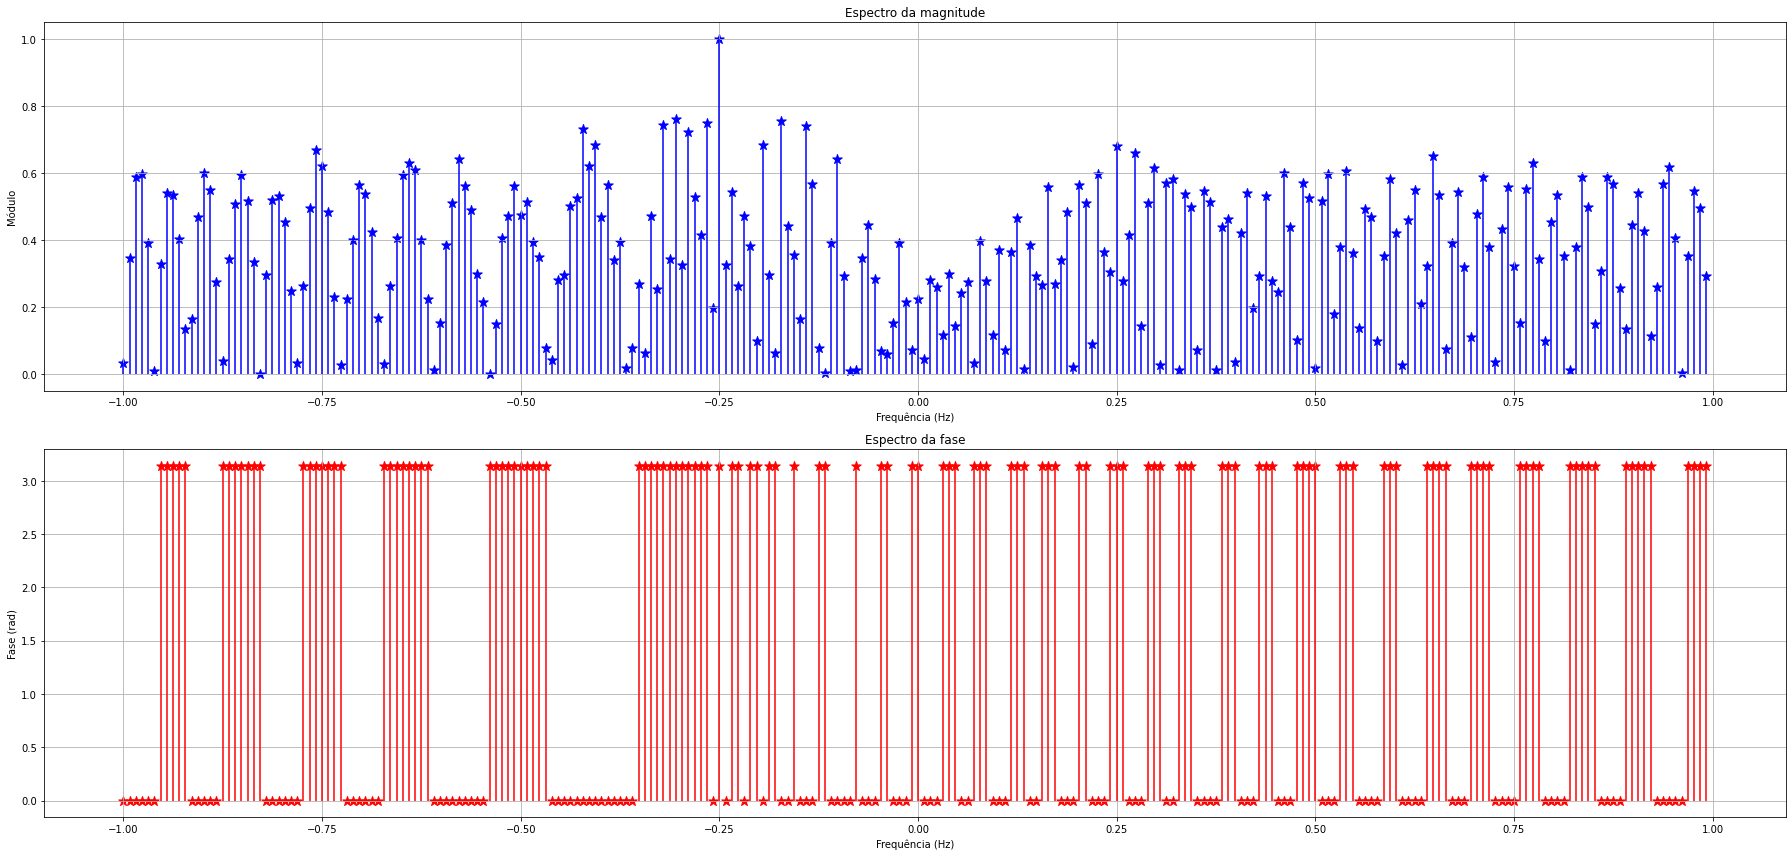

In [65]:
# Calcula o espectro do sinal de entrada u(t) usando a FFT
U = np.fft.fft(u)
# Vetor de frequencias para o eixo x
frequencies = np.fft.fftfreq(len(U), d=T)
# Modulo do espectro do sinal de entrada
modulo_U = np.abs(U)
# Fase do espectro do sinal de entrada
fase_U = np.angle(U)
# Plot do espectro do sinal de entrada (modulo e fase)
plt.figure(figsize=(25, 12))
# Plot do modulo com estrelas e linhas para o eixo x
plt.subplot(2, 1, 1)
plt.scatter(frequencies, modulo_U, marker='*', s=100, color='b')
plt.vlines(frequencies, ymin=0, ymax=modulo_U, colors='b')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Módulo')
plt.title('Espectro da magnitude')
plt.grid()
# Plot da fase com estrelas e linhas para o eixo x
plt.subplot(2, 1, 2)
plt.scatter(frequencies, fase_U, marker='*', s=100, color='r')
plt.vlines(frequencies, ymin=0, ymax=fase_U, colors='r')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.title('Espectro da fase')
plt.grid()
plt.tight_layout()
plt.show()

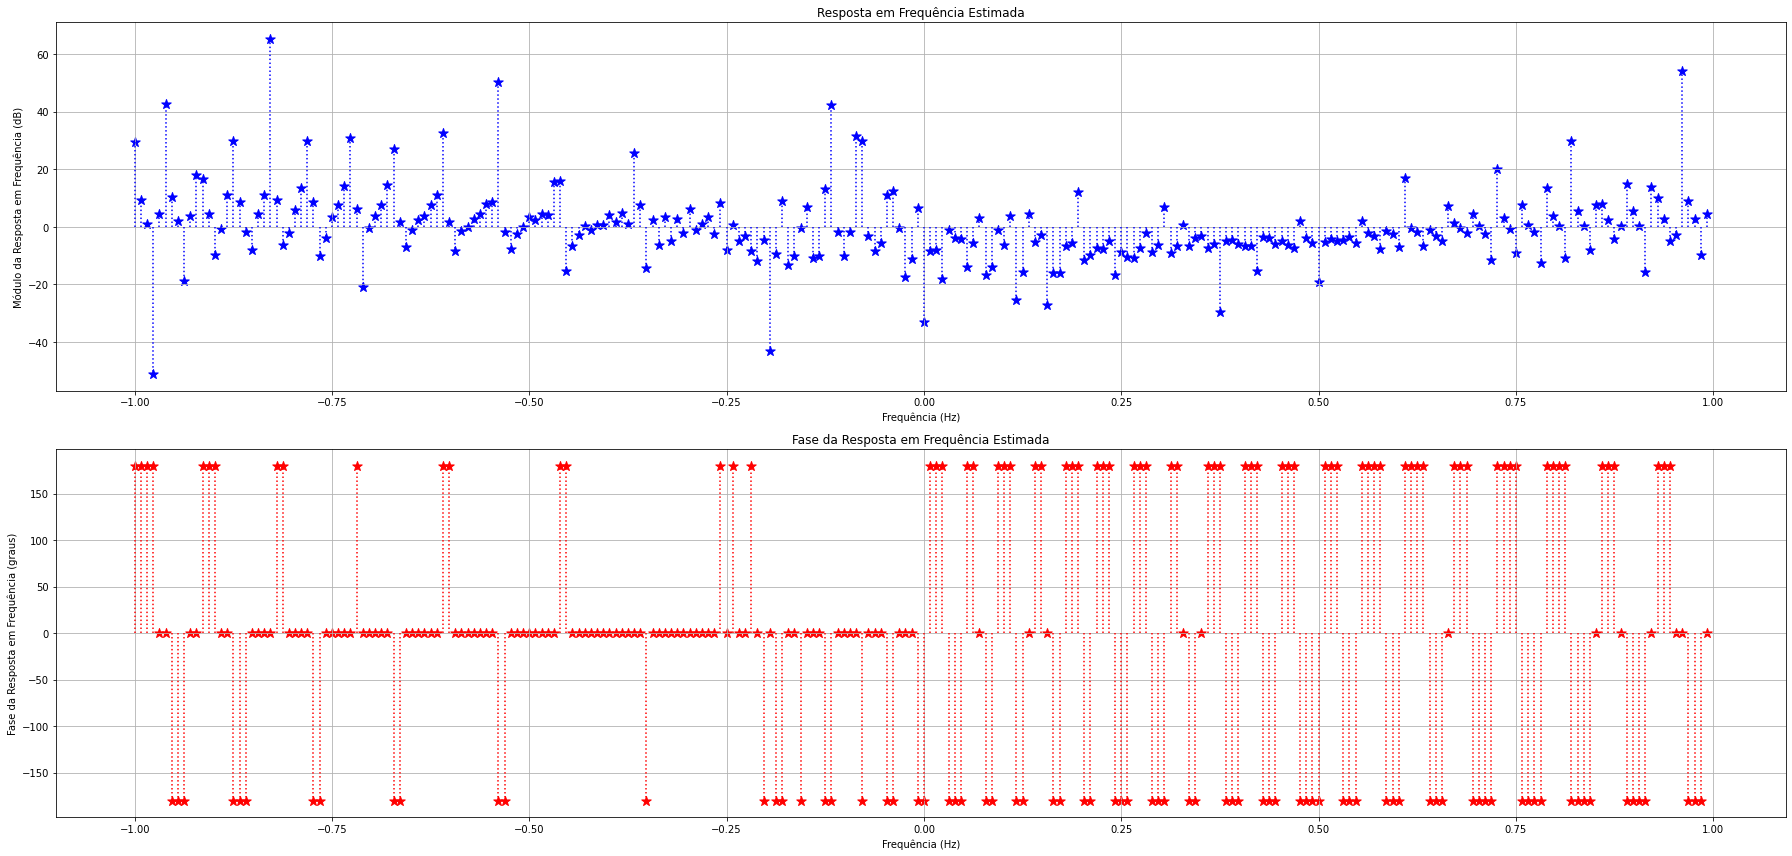

In [66]:
# Calcula o espectro do sinal de saida y(t) usando a FFT
Y = np.fft.fft(y)
# Calcula a resposta em frequencia estimada G(jw)
G = Y / U
# Calcula o modulo em dB da resposta em frequencia estimada
modulo_G_dB = 20 * np.log10(np.abs(G))
# Calcula a fase em graus da resposta em frequencia estimada
fase_G_graus = np.angle(G) * (180 / np.pi)
# Plot dos graficos usando subplot
plt.figure(figsize=(25, 12))
# Plot do modulo com estrelas e linhas para o eixo x (resposta em frequencia estimada - modulo)
plt.subplot(2, 1, 1)
plt.scatter(frequencies, modulo_G_dB, marker='*', s=100, color='b')
plt.vlines(frequencies, ymin=0, ymax=modulo_G_dB, colors='b', linestyles='dotted')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Módulo da Resposta em Frequência (dB)')
plt.title('Resposta em Frequência Estimada')
plt.grid()
# Plot da fase com estrelas e linhas para o eixo x (resposta em frequencia estimada - fase)
plt.subplot(2, 1, 2)
plt.scatter(frequencies, fase_G_graus, marker='*', s=100, color='r')
plt.vlines(frequencies, ymin=0, ymax=fase_G_graus, colors='r', linestyles='dotted')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase da Resposta em Frequência (graus)')
plt.title('Fase da Resposta em Frequência Estimada')
plt.grid()
plt.tight_layout()
plt.show()

In [67]:
from scipy.optimize import curve_fit

# Função de transferência de segunda ordem
def second_order_transfer_function(w, K, wn, zeta):
    return K / ((w**2) + 2*zeta*wn*w + wn**2)

# Encontra os melhores valores para os parâmetros K, wn e zeta usando curve_fit
params, _ = curve_fit(second_order_transfer_function, 2*np.pi*frequencies, np.abs(G), p0=[1, 1, 0.1])

# Extrai os parâmetros estimados do ajuste
K_fit, wn_fit, zeta_fit = params

# Calcula a resposta em frequência estimada utilizando os parâmetros ajustados
G_approximation = second_order_transfer_function(2*np.pi*frequencies, K_fit, wn_fit, zeta_fit)

# Calcula o módulo em dB da resposta em frequência estimada
modulo_G_dB = 20 * np.log10(np.abs(G))

# Calcula a fase em graus da resposta em frequência estimada
fase_G_graus = np.angle(G) * (180 / np.pi)

# Plot dos gráficos usando subplot
plt.figure(figsize=(12, 10))

# Plot do módulo com estrelas e linhas para o eixo x (resposta em frequência estimada - módulo)
plt.subplot(2, 1, 1)
plt.plot(frequencies, modulo_G_dB, color='b', label='Resposta em Frequência Estimada')
plt.plot(frequencies, 20*np.log10(np.abs(G_approximation)), 'r--', label='Aproximação 2ª Ordem')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Módulo da Resposta em Frequência (dB)')
plt.title('Resposta em Frequência Estimada e Aproximação de 2ª Ordem')
plt.legend()
plt.grid(which='both', linestyle='dotted', linewidth=0.5)
plt.minorticks_on()

# Plot da fase com estrelas e linhas para o eixo x (resposta em frequência estimada - fase)
plt.subplot(2, 1, 2)
plt.plot(frequencies, fase_G_graus, color='b', label='Resposta em Frequência Estimada')
plt.plot(frequencies, np.angle(G_approximation) * (180 / np.pi), 'r--', label='Aproximação 2ª Ordem')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase da Resposta em Frequência (graus)')
plt.title('Fase da Resposta em Frequência Estimada e Aproximação de 2ª Ordem')
plt.legend()
plt.grid(which='both', linestyle='dotted', linewidth=0.5)
plt.minorticks_on()

plt.tight_layout()
plt.show()

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.